In [3]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

print(keras.__version__)

2.11.0
2.11.0


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [5]:
# load data
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

In [8]:
X_train_full.shape


(60000, 28, 28)

* Podzielmy pełny zestaw treningowy na zestaw walidacyjny i zestaw treningowy. 
* Kolor pikseli skalujemy również do zakresu 0-1 i przekształcamy na zmiennoprzecinkowe, dzieląc przez 255.

In [9]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

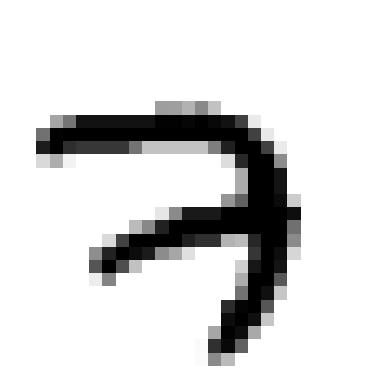

In [10]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

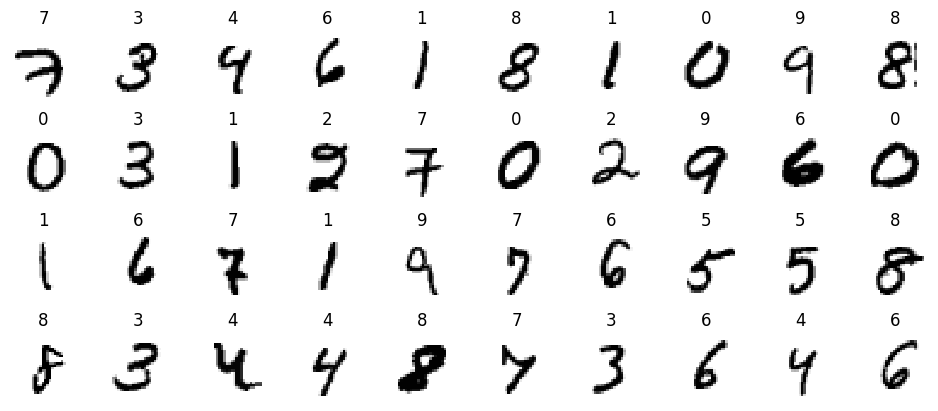

In [11]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(y_train[index], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [12]:
from keras.utils import np_utils
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

y_valid = np_utils.to_categorical(y_valid)

print(y_train)

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


# Zad
Zbuduj i naucz sieć neuronową zgodnie z poniższym schematem. 

In [13]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


2023-06-10 10:00:29.894471: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [14]:
model.compile(loss="categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [15]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 3s 1ms/step - loss: 0.5993 - accuracy: 0.8446 - val_loss: 0.3008 - val_accuracy: 0.9186
Epoch 2/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2863 - accuracy: 0.9180 - val_loss: 0.2370 - val_accuracy: 0.9346
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2356 - accuracy: 0.9325 - val_loss: 0.1986 - val_accuracy: 0.9446
Epoch 4/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2025 - accuracy: 0.9420 - val_loss: 0.1778 - val_accuracy: 0.9512
Epoch 5/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.1779 - accuracy: 0.9485 - val_loss: 0.1580 - val_accuracy: 0.9540
Epoch 6/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.1584 - accuracy: 0.9547 - val_loss: 0.1445 - val_accuracy: 0.9608
Epoch 7/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.1421 - accuracy: 0.9591 - val_loss: 0.1330 - val_accuracy:

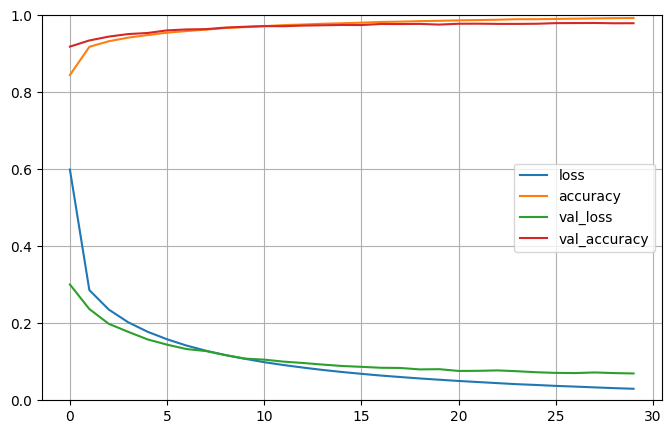

In [16]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [17]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 752us/step - loss: 0.0721 - accuracy: 0.9768


[0.07205303013324738, 0.9768000245094299]

In [56]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

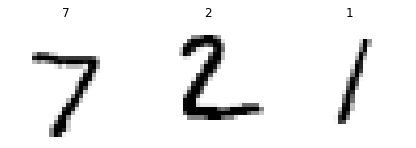

In [59]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(np.argmax(y_proba[index]), fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

# Zad.

Porównaj powyższy wynik  z różnymi funkcjami aktywacji:
* relu
* elu
* LeakyReLU

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
1719/1719 [==============================] - 3s 1ms/step - loss: 0.5251 - accuracy: 0.8589 - val_loss: 0.3138 - val_accuracy: 0.9112
Epoch 2/30
1719/1719 [================

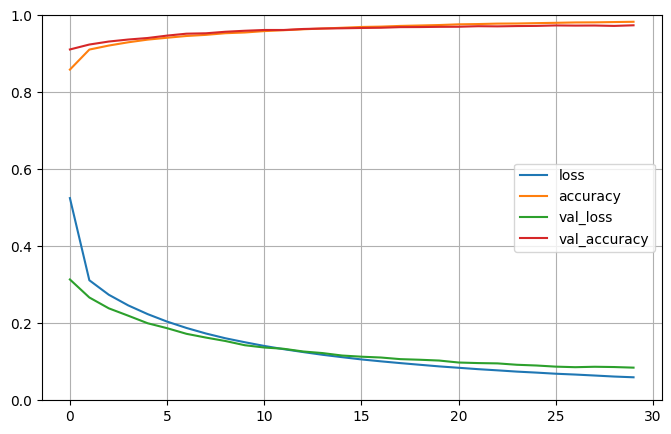

In [18]:
# ELU ACTIVATION FUNCTION

keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="elu"),
    keras.layers.Dense(100, activation="elu"),
    keras.layers.Dense(10, activation="softmax")
])

model.summary()
model.compile(loss="categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])
historyELU = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

pd.DataFrame(historyELU.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
1719/1719 [==============================] - 3s 1ms/step - loss: 0.5685 - accuracy: 0.8505 - val_loss: 0.3123 - val_accuracy: 0.9118
Epoch 2/30
1719/1719 [================

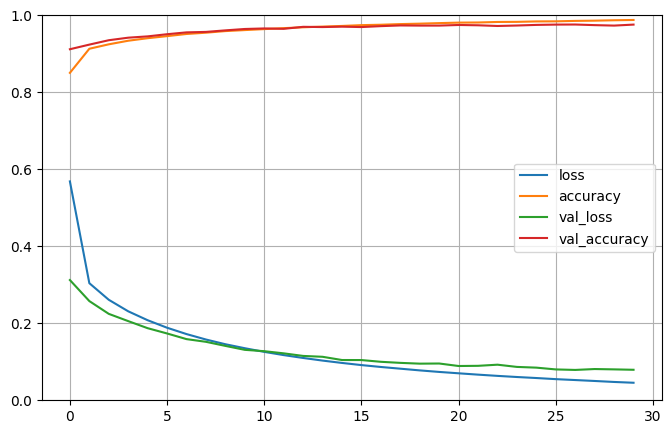

In [19]:
# LEAKY RELU ACTIVATION FUNCTION

keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="LeakyReLU"),
    keras.layers.Dense(100, activation="LeakyReLU"),
    keras.layers.Dense(10, activation="softmax")
])

model.summary()
model.compile(loss="categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])
historyLeakyReLU = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

pd.DataFrame(historyLeakyReLU.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

# Zad. 
Stwórz wykres porównujący metody. 

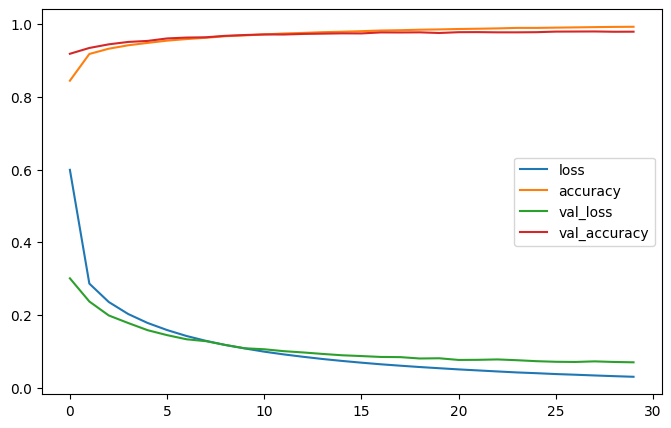

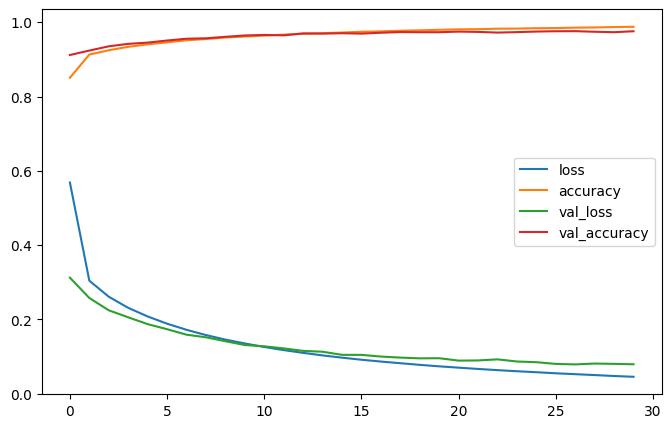

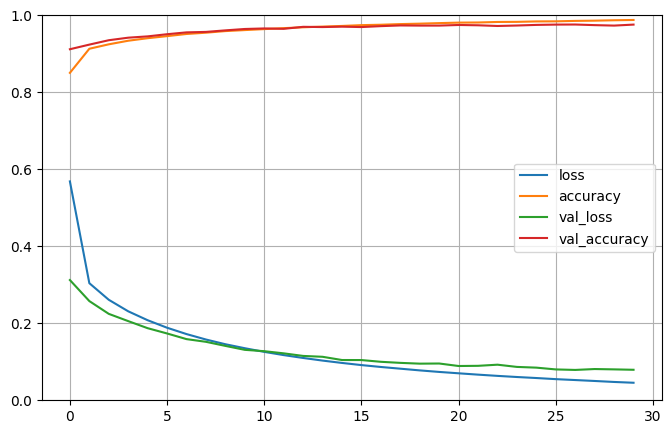

In [20]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
pd.DataFrame(historyELU.history).plot(figsize=(8, 5))
pd.DataFrame(historyLeakyReLU.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()